# Финансовые рынки как случайное блуждание
Случайное блуждание — хорошая стартовая модель для описания финансовых временных рядов. Действительно, цены на акции часто приводятся в качестве наглядного примера естественного случайного блуждания. При описании наших данных с его помощью следует помнить о двух важных моментах.

Во-первых, многие смены режимов могут быть просто следствием естественных процессов модели случайного блуждания. Если не верите, рассмотрите некоторые из следующих примеров, которые были реализованы на языке R (рис. 13.5).

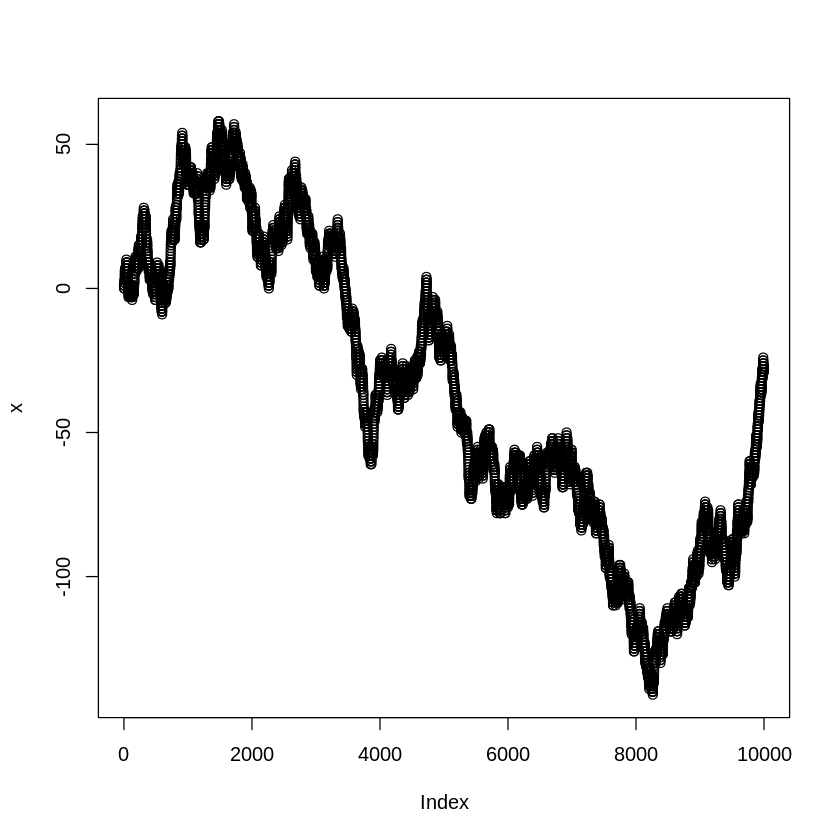

In [1]:
# Устанавливаем начальное значение для воспроизводимости результатов
# set.seed(l)
set.seed(100)

# Задаем количество наблюдений
N <- 10000

# Генерируем случайные выборки из {-1, 1} и вычисляем кумулятивную сумму
x <- cumsum(sample(c(-1, 1), N, TRUE))

# Строим график
plot(x)


Рис.  Результаты случайного блуждания с разными начальными значениями

Во-вторых, поскольку случайное блуждание описывает данные котировок естественным образом, нашей базовой моделью, с которой сравниваются другие, более сложные, модели, будет та, которая позволяет спрогнозировать цену на завтра по сегодняшней цене, исходя из понимания фондового рынка как случайного блуждания. В подобном случае ожидается очень сильная корреляция.

In [4]:
# Вычисляем корреляцию между вектором x и его сдвигом
cor(x, lag(x), use = "complete.obs")


[1] 1

С другой стороны, при таком построении разностных временных рядов, при котором значение на каждом временном шаге представляет изменение значения временного ряда от одного временного шага к другому, корреляция не проявлялась бы; она предопределяется общим трендом, а не фактической прогнозирующей способностью простой модели.

In [5]:
# Вычисляем корреляцию между разностями вектора x и сдвинутыми разностями
cor(diff(x), lag(diff(x)), use = "complete.obs")


[1] 1

аким образом, в финансовом анализе, независимо от того, создается модель с высокой или низкой корреляцией, многое зависит от типа данных, подлежащих моделированию. При моделировании доходности (что мы и будем делать), а не цен на акции (распространенная ошибка даже в отрасли) корреляции в данных будут заметно меньшими, а сами модели при решении реальных задач с большей вероятностью будут скорее прогностическими, чем многообещающими, но не имеющими практической ценности. Именно поэтому в следующем примере мы будем рассматривать модель описания доходности, а не цен на акции.